<center><h1>Hong_Seungil_HW7</h1></center>

Name: Seungil Hong
<br>
Github Username: zonna19
<br>
USC ID: 2375832093 

## 1. Multi-class and Multi-Label Classification Using Support Vector Machines

Import packages

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
from scipy.spatial.distance import hamming
from gap_statistic import OptimalK
from sklearn.datasets import make_blobs

### (a) Download the Anuran Calls (MFCCs) Data Set

In [2]:
# Data read
df_raw = pd.read_csv('..\data\Frogs_MFCCs.csv')

In [3]:
df_raw

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber,60
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber,60
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber,60
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber,60


In [4]:
# Identify features with missing values
missing_data = df_raw.isnull().sum()

# print columns with missing values
print("Missing Data columns\n", missing_data[missing_data > 0],"\n==========================")  


Missing Data columns
 Series([], dtype: int64) 


In [5]:
# Split data into training and test sets (30%)
raw_tr, raw_te = train_test_split(df_raw, test_size=0.30, random_state=42)

### (b) Train a classifier for each label

#### (i) Research

> Exact Match and Hamming Loss are two methods used for evaluating multi-label classification models:

> * Exact Match (also known as Subset Accuracy): This is the most strict metric, as it requires the predicted set of labels to exactly match the true set of labels for each sample. It's a harsh metric because it doesn't give any partial credit for being partially correct.

> * Hamming Loss: This calculates the average Hamming loss or Hamming distance between two sets of samples. The Hamming loss is the fraction of labels that are incorrectly predicted, so it's a measure of how many label predictions were incorrect out of all label predictions made. It is more forgiving than the Exact Match because it doesn't require all labels to be correct for the sample to be considered correct. Instead, it penalizes only the individual incorrect labels​​​​.

> Reference https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import make_scorer, accuracy_score, classification_report, hamming_loss,  f1_score
from sklearn.preprocessing import MultiLabelBinarizer

#### (ii) Train a SVM for each of the labels

In [7]:
# Split Attributes and Classifications
# For train
X_tr_raw = raw_tr.iloc[:, :-4]
y_tr_raw = raw_tr.iloc[:, -4:-1]

# For test
X_te_raw = raw_te.iloc[:, :-4]
y_te_raw = raw_te.iloc[:, -4:-1]

In [8]:
y_tr_raw

,Family,Genus,Species
2004,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1194,Dendrobatidae,Ameerega,Ameeregatrivittata
5359,Hylidae,Hypsiboas,HypsiboasCinerascens
1756,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
497,Leptodactylidae,Adenomera,AdenomeraAndre
...,...,...,...
3772,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
5191,Hylidae,Hypsiboas,HypsiboasCinerascens
5226,Hylidae,Hypsiboas,HypsiboasCinerascens
5390,Hylidae,Hypsiboas,HypsiboasCinerascens


* Non-standardized dataset

In [9]:
# Define the parameter grid for 'C' and 'gamma'
param_grid = {
    'C': [1, 10, 100, 1000 ],  # Example values
    'gamma': [1, 2, 3, 4]  # Example values
}

# Initialize the scorer and collect predictions
scorer = make_scorer(f1_score, average='macro')

num_labels = 3  # three labels: Family, Genus, Species
num_samples = raw_te.shape[0]  # Number of samples in your test set

# Initialize a matrix to hold all predictions
all_predictions = np.empty((num_samples, num_labels), dtype=object)


In [10]:
# Initialize and train the SVMs with cross-validation for each label
for i, label in enumerate(['Family', 'Genus', 'Species']):
    y_train = raw_tr[label]
    svm = SVC(kernel='rbf')
    clf = GridSearchCV(svm, param_grid, cv=10, scoring=scorer)
    clf.fit(X_tr_raw, y_train)
    best_C = clf.best_params_['C']
    best_gamma = clf.best_params_['gamma']
    print(f"Best params for {label}: C={best_C}, gamma={best_gamma}")

    svm_best = SVC(kernel='rbf', C=best_C, gamma=best_gamma)
    svm_best.fit(X_tr_raw, y_train)
    y_te_pred = svm_best.predict(X_te_raw)
    all_predictions[:, i] = y_te_pred  # Fill the column with predictions for the current label
    te_accuracy = f1_score(raw_te[label], y_te_pred, average='macro')
    
    print(f"Test F1 Score (Macro) for {label}: {te_accuracy:.4f}")
    print(classification_report(raw_te[label], y_te_pred))

Best params for Family: C=10, gamma=3
Test F1 Score (Macro) for Family: 0.9871
                 precision    recall  f1-score   support

      Bufonidae       1.00      0.93      0.96        27
  Dendrobatidae       0.99      1.00      1.00       162
        Hylidae       0.99      1.00      0.99       623
Leptodactylidae       1.00      0.99      1.00      1347

       accuracy                           1.00      2159
      macro avg       1.00      0.98      0.99      2159
   weighted avg       1.00      1.00      1.00      2159

Best params for Genus: C=10, gamma=2
Test F1 Score (Macro) for Genus: 0.9669
               precision    recall  f1-score   support

    Adenomera       0.99      1.00      1.00      1251
     Ameerega       0.99      1.00      1.00       162
Dendropsophus       0.99      0.95      0.97        84
    Hypsiboas       0.98      1.00      0.99       468
Leptodactylus       1.00      0.97      0.98        96
Osteocephalus       0.88      0.88      0.88        34

In [11]:
# Instantiate the binarizer
mlb = MultiLabelBinarizer()

In [12]:
# Binarize the training labels
y_tr_bin = mlb.fit_transform(y_tr_raw.values)

# Binarize the test labels
y_te_bin = mlb.fit_transform(y_te_raw.values)

In [13]:
# Binarize the predictions
predictions_binarized = mlb.transform(all_predictions)

# Calculate Exact Match (Subset Accuracy) across all labels
exact_matches = np.all(y_te_bin == predictions_binarized, axis=1)
exact_match_score = np.mean(exact_matches)
print(f'Exact Match Score : {exact_match_score:.4f}')

# Calculate Hamming Loss across all labels using the binarized data
hamm_loss = hamming_loss(y_te_bin, predictions_binarized)
print(f'Hamming Loss: {hamm_loss:.4f}')

Exact Match Score : 0.9870
Hamming Loss: 0.0024


> * Exact Match (Subset Accuracy): 0.9870
>> This score implies that in 98.61% of instances, the model's predictions were entirely correct across all labels. In other words, for nearly all the samples, every predicted label matched the true label. A sample's predicted label set to be exactly the same as the true set to be considered correct. 
> * Hamming Loss: 0.0024
>> The Hamming Loss is the fraction of labels that are incorrectly predicted, which means it's the average number of label errors per sample. A lower score is better. Specifically, it means that, on average, only 0.25% of the labels were incorrectly predicted.

* Standardize the dataset

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_tr_scale = scaler.fit_transform(X_tr_raw)
X_te_scale = scaler.fit_transform(X_te_raw)

In [15]:
# Do the same with standardized datasets
param_grid = {
    'C': [1, 10, 100, 1000 ],  # Example values
    'gamma': [0.001, 0.01, 0.1, 1, 2, 3]  # Example values
}

num_labels = 3  # three labels: Family, Genus, Species
num_samples = raw_te.shape[0]  # Number of samples in your test set

# Initialize a matrix to hold all predictions
all_predictions = np.empty((num_samples, num_labels), dtype=object)

# Initialize the scorer
scorer = make_scorer(f1_score, average='macro')

# Initialize and train the SVMs with cross-validation for each label
for i, label in enumerate(['Family', 'Genus', 'Species']):
    y_train = raw_tr[label]
    svm = SVC(kernel='rbf')
    clf = GridSearchCV(svm, param_grid, cv=10, scoring=scorer)
    clf.fit(X_tr_scale, y_train)
    best_C = clf.best_params_['C']
    best_gamma = clf.best_params_['gamma']
    print(f"Best params for {label}: C={best_C}, gamma={best_gamma}")

    svm_best = SVC(kernel='rbf', C=best_C, gamma=best_gamma)
    svm_best.fit(X_tr_scale, y_train)
    y_te_pred = svm_best.predict(X_te_scale)
    all_predictions[:, i] = y_te_pred  # Fill the column with predictions for the current label
    te_accuracy = f1_score(raw_te[label], y_te_pred, average='macro')
    
    print(f"Test F1 Score (Macro) for {label}: {te_accuracy:.4f}")
    print(classification_report(raw_te[label], y_te_pred))

Best params for Family: C=10, gamma=0.1
Test F1 Score (Macro) for Family: 0.9815
                 precision    recall  f1-score   support

      Bufonidae       1.00      0.89      0.94        27
  Dendrobatidae       1.00      1.00      1.00       162
        Hylidae       0.98      1.00      0.99       623
Leptodactylidae       1.00      0.99      1.00      1347

       accuracy                           0.99      2159
      macro avg       0.99      0.97      0.98      2159
   weighted avg       0.99      0.99      0.99      2159

Best params for Genus: C=1000, gamma=0.01
Test F1 Score (Macro) for Genus: 0.9621
               precision    recall  f1-score   support

    Adenomera       1.00      1.00      1.00      1251
     Ameerega       0.99      1.00      1.00       162
Dendropsophus       0.99      0.98      0.98        84
    Hypsiboas       0.97      0.99      0.98       468
Leptodactylus       0.99      0.96      0.97        96
Osteocephalus       0.88      0.85      0.87   

In [16]:
# Binarize the predictions
predictions_binarized = mlb.transform(all_predictions)

# Calculate Exact Match (Subset Accuracy) across all labels
exact_matches = np.all(y_te_bin == predictions_binarized, axis=1)
exact_match_score = np.mean(exact_matches)
print(f'Exact Match Score : {exact_match_score:.4f}')

# Calculate Hamming Loss across all labels using the binarized data
hamm_loss = hamming_loss(y_te_bin, predictions_binarized)
print(f'Hamming Loss: {hamm_loss:.4f}')

Exact Match Score : 0.9833
Hamming Loss: 0.0028


#### (iii) Repeat 1(b)ii with L1-penalized SVMs

* With raw (Normalized only) dataset

In [17]:
# Define the parameter grid for 'C' and 'gamma'
param_grid = {
    'C': np.logspace(1, 5, 10),  # Example values
}

# Initialize the scorer and collect predictions
scorer = make_scorer(f1_score, average='macro')

num_labels = 3  # three labels: Family, Genus, Species
num_samples = raw_te.shape[0]  # Number of samples in your test set

# Initialize a matrix to hold all predictions
all_predictions = np.empty((num_samples, num_labels), dtype=object)

# Initialize and train the SVMs with cross-validation for each label
for i, label in enumerate(['Family', 'Genus', 'Species']):
    y_train = raw_tr[label]
    svm_l = LinearSVC(penalty='l1', dual=False)
    clf = GridSearchCV(svm_l, param_grid, cv=10, scoring=scorer)
    clf.fit(X_tr_raw, y_train)
    best_C = clf.best_params_['C']
    print(f"Best params for {label}: C={best_C}")

    svm_l_best = LinearSVC(penalty='l1', C=best_C, dual=False)
    svm_l_best.fit(X_tr_raw, y_train)
    y_te_pred = svm_l_best.predict(X_te_raw)
    all_predictions[:, i] = y_te_pred  # Fill the column with predictions for the current label
    te_accuracy = f1_score(raw_te[label], y_te_pred, average='macro')
    
    print(f"Test F1 Score (Macro) for {label}: {te_accuracy:.4f}")
    print(classification_report(raw_te[label], y_te_pred))

Best params for Family: C=77.4263682681127
Test F1 Score (Macro) for Family: 0.6782
                 precision    recall  f1-score   support

      Bufonidae       0.00      0.00      0.00        27
  Dendrobatidae       0.84      0.88      0.86       162
        Hylidae       0.89      0.90      0.90       623
Leptodactylidae       0.96      0.96      0.96      1347

       accuracy                           0.93      2159
      macro avg       0.67      0.69      0.68      2159
   weighted avg       0.92      0.93      0.92      2159

Best params for Genus: C=77.4263682681127
Test F1 Score (Macro) for Genus: 0.8083
               precision    recall  f1-score   support

    Adenomera       0.96      0.98      0.97      1251
     Ameerega       0.89      0.94      0.92       162
Dendropsophus       0.92      0.71      0.81        84
    Hypsiboas       0.90      0.97      0.93       468
Leptodactylus       0.98      0.89      0.93        96
Osteocephalus       0.89      0.50      0.64

In [18]:
# Binarize the predictions
predictions_binarized = mlb.transform(all_predictions)

# Calculate Exact Match (Subset Accuracy) across all labels
exact_matches = np.all(y_te_bin == predictions_binarized, axis=1)
exact_match_score = np.mean(exact_matches)
print(f'Exact Match Score : {exact_match_score:.4f}')

# Calculate Hamming Loss across all labels using the binarized data
hamm_loss = hamming_loss(y_te_bin, predictions_binarized)
print(f'Hamming Loss: {hamm_loss:.4f}')

Exact Match Score : 0.9101
Hamming Loss: 0.0156


* With Standardized dataset

In [19]:
# Initialize the scorer and collect predictions
scorer = make_scorer(f1_score, average='macro')

num_labels = 3  # three labels: Family, Genus, Species
num_samples = raw_te.shape[0]  # Number of samples in your test set

# Initialize a matrix to hold all predictions
all_predictions = np.empty((num_samples, num_labels), dtype=object)

# Initialize and train the SVMs with cross-validation for each label
for i, label in enumerate(['Family', 'Genus', 'Species']):
    y_train = raw_tr[label]
    svm_l = LinearSVC(penalty='l1', dual=False)
    clf = GridSearchCV(svm_l, param_grid, cv=10, scoring=scorer)
    clf.fit(X_tr_scale, y_train)
    best_C = clf.best_params_['C']
    print(f"Best params for {label}: C={best_C}")

    svm_l_best = LinearSVC(penalty='l1', C=best_C, dual=False)
    svm_l_best.fit(X_tr_scale, y_train)
    y_te_pred = svm_l_best.predict(X_te_scale)
    all_predictions[:, i] = y_te_pred  # Fill the column with predictions for the current label
    te_accuracy = f1_score(raw_te[label], y_te_pred, average='macro')
    
    print(f"Test F1 Score (Macro) for {label}: {te_accuracy:.4f}")
    print(classification_report(raw_te[label], y_te_pred))

Best params for Family: C=10.0
Test F1 Score (Macro) for Family: 0.6798
                 precision    recall  f1-score   support

      Bufonidae       0.00      0.00      0.00        27
  Dendrobatidae       0.86      0.88      0.87       162
        Hylidae       0.88      0.91      0.89       623
Leptodactylidae       0.96      0.96      0.96      1347

       accuracy                           0.93      2159
      macro avg       0.67      0.69      0.68      2159
   weighted avg       0.92      0.93      0.92      2159

Best params for Genus: C=10.0
Test F1 Score (Macro) for Genus: 0.7947
               precision    recall  f1-score   support

    Adenomera       0.96      0.98      0.97      1251
     Ameerega       0.90      0.93      0.91       162
Dendropsophus       0.89      0.70      0.79        84
    Hypsiboas       0.90      0.97      0.93       468
Leptodactylus       0.99      0.89      0.93        96
Osteocephalus       0.94      0.44      0.60        34
     Rhinella

In [20]:
# Binarize the predictions
predictions_binarized = mlb.transform(all_predictions)

# Calculate Exact Match (Subset Accuracy) across all labels
exact_matches = np.all(y_te_bin == predictions_binarized, axis=1)
exact_match_score = np.mean(exact_matches)
print(f'Exact Match Score : {exact_match_score:.4f}')

# Calculate Hamming Loss across all labels using the binarized data
hamm_loss = hamming_loss(y_te_bin, predictions_binarized)
print(f'Hamming Loss: {hamm_loss:.4f}')

Exact Match Score : 0.9092
Hamming Loss: 0.0160


#### (iv) Repeat 1(b)iii by using SMOTE or any other method for imbalance

In [21]:
# Define the parameter grid, notice the double underscore '__'
param_grid = {
    'svm__C': [0.1, 1, 10, 100, 1000]
}

# Initialize the scorer
scorer = make_scorer(f1_score, average='macro')

num_labels = 3  # three labels: Family, Genus, Species
num_samples = raw_te.shape[0]  # Number of samples in your test set

# Initialize a matrix to hold all predictions
all_predictions = np.empty((num_samples, num_labels), dtype=object)

# Initialize SMOTE
sm = SMOTE()

# Train separate models for each label
for i, label in enumerate(['Family', 'Genus', 'Species']):
    y_train = y_tr_raw[label].values
    y_test = raw_te[label].values

    # Initialize the L1-penalized SVM
    svm_l = LinearSVC(penalty='l1', dual=False)

    # Create a pipeline that first applies SMOTE and then fits the SVM
    pipeline = ImbPipeline([
        ('smote', sm),
        ('svm', svm_l)
    ])

    # Perform grid search with cross-validation
    clf = GridSearchCV(pipeline, param_grid, cv=10, scoring=scorer)
    clf.fit(X_tr_scale, y_train)

    # Get the best parameters and accuracy
    best_C = clf.best_params_['svm__C']
    print(f"Best params for {label}: C={best_C}")

    # The best estimator from GridSearchCV is already re-trained on the full training set
    best_estimator = clf.best_estimator_
    
    # Predict on the test set using the best estimator
    y_pred = best_estimator.predict(X_te_scale)
    all_predictions[:, i] = y_pred  # Store predictions

    # Calculate and print the accuracy and classification report
    te_accuracy = f1_score(y_test, y_pred, average='macro')
    print(f"F1 Score for {label}: {te_accuracy:.4f}")
    print(classification_report(y_test, y_pred))

Best params for Family: C=10
F1 Score for Family: 0.7937
                 precision    recall  f1-score   support

      Bufonidae       0.35      0.89      0.51        27
  Dendrobatidae       0.73      0.97      0.84       162
        Hylidae       0.91      0.87      0.89       623
Leptodactylidae       0.97      0.92      0.94      1347

       accuracy                           0.91      2159
      macro avg       0.74      0.91      0.79      2159
   weighted avg       0.93      0.91      0.91      2159

Best params for Genus: C=100
F1 Score for Genus: 0.8146
               precision    recall  f1-score   support

    Adenomera       0.98      0.91      0.94      1251
     Ameerega       0.84      0.95      0.89       162
Dendropsophus       0.61      0.82      0.70        84
    Hypsiboas       0.94      0.94      0.94       468
Leptodactylus       0.99      0.90      0.94        96
Osteocephalus       0.56      0.88      0.68        34
     Rhinella       0.44      0.89      0.

In [22]:
# Binarize the predictions
predictions_binarized = mlb.transform(all_predictions)

# Calculate Exact Match (Subset Accuracy) across all labels
exact_matches = np.all(y_te_bin == predictions_binarized, axis=1)
exact_match_score = np.mean(exact_matches)
print(f'Exact Match Score : {exact_match_score:.4f}')

# Calculate Hamming Loss across all labels using the binarized data
hamm_loss = hamming_loss(y_te_bin, predictions_binarized)
print(f'Hamming Loss: {hamm_loss:.4f}')

Exact Match Score : 0.8666
Hamming Loss: 0.0200


> * So far with Non-standardized dataset with Gaussian Kernel SVM has the best Exact Match Score and the lowest Hamming loss.

## 2. K-Means Clustering on a Multi-Class and Multi-Label Data Set

### (a) Use k-means clustering

In [23]:
X_raw = df_raw.iloc[:, :-4]
y_raw = df_raw.iloc[:, -4:-1]

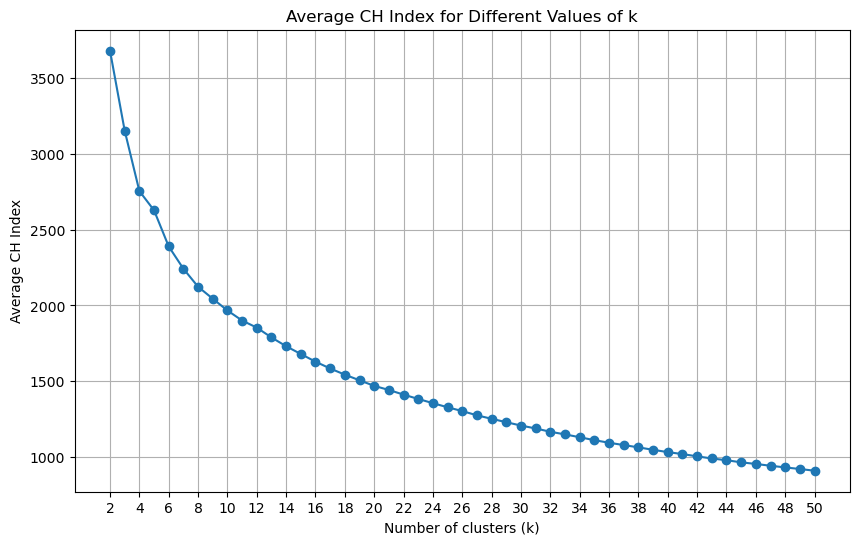

In [24]:
# Parameters for Monte-Carlo simulation
num_iterations = 50  # Number of iterations for each k
k_values = range(2, 51)  # k from 2 to 50

# Dictionary to store CH scores for each k across all iterations
ch_scores = {k: [] for k in k_values}

# Monte-Carlo simulation
for k in k_values:
    for iteration in range(num_iterations):
        # Random seed for each iteration
        random_seed = np.random.randint(0, 1000)

        # Apply K-means clustering
        kmeans = KMeans(n_clusters=k, random_state=random_seed)
        clusters = kmeans.fit_predict(X_raw)

        # Calculate CH score and append to the corresponding list
        ch_score = calinski_harabasz_score(X_raw, clusters)
        ch_scores[k].append(ch_score)

# Calculating the average CH score for each k
avg_ch_scores = {k: np.mean(scores) for k, scores in ch_scores.items()}

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(list(avg_ch_scores.keys()), list(avg_ch_scores.values()), marker='o')
plt.title('Average CH Index for Different Values of k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average CH Index')
plt.xticks(range(2, 51, 2))  # Set x-axis ticks for better readability
plt.grid(True)
plt.show()

> * CH Index plot : despite the CH index being highest there. The highest value of the CH index does indicate that, at k=2, the clusters are very well separated and compact. However, in practice, the optimal number of clusters is often chosen at the "elbow" of the curve, which is the point where the rate of decrease sharply changes. So it may k=10 is the sweetspot.

> Let's try silhouette method

k=2: Average Hamming Distance = 0.5102, Standard Deviation = 0.4999
k=3: Average Hamming Distance = 0.5984, Standard Deviation = 0.3839
k=4: Average Hamming Distance = 0.7689, Standard Deviation = 0.2604
k=5: Average Hamming Distance = 0.6936, Standard Deviation = 0.2989
k=6: Average Hamming Distance = 0.7453, Standard Deviation = 0.2547
k=7: Average Hamming Distance = 0.8523, Standard Deviation = 0.1681
k=8: Average Hamming Distance = 0.8582, Standard Deviation = 0.1661
k=9: Average Hamming Distance = 0.8585, Standard Deviation = 0.1225
k=10: Average Hamming Distance = 0.8879, Standard Deviation = 0.1161
k=11: Average Hamming Distance = 0.9259, Standard Deviation = 0.1084
k=12: Average Hamming Distance = 0.8739, Standard Deviation = 0.1291
k=13: Average Hamming Distance = 0.9173, Standard Deviation = 0.0919
k=14: Average Hamming Distance = 0.9013, Standard Deviation = 0.0937
k=15: Average Hamming Distance = 0.8628, Standard Deviation = 0.2027
k=16: Average Hamming Distance = 0.9144, S

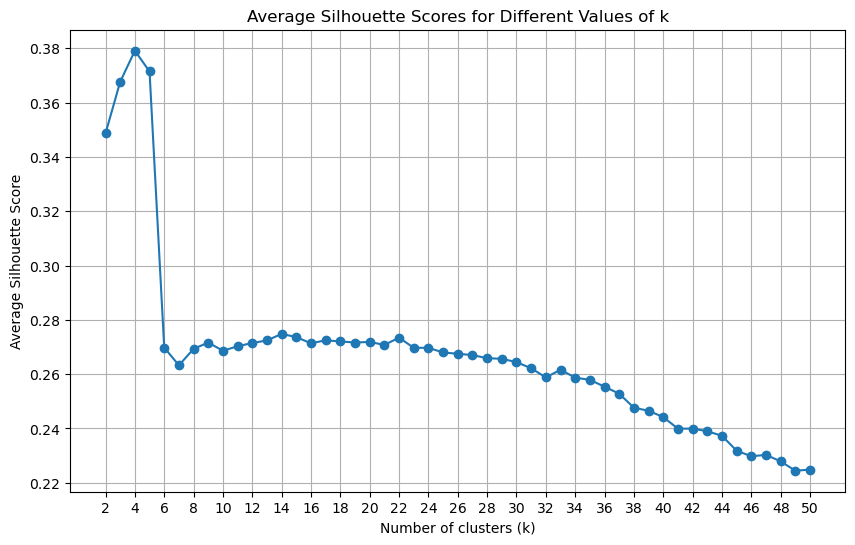

In [25]:
# Dictionary to store silhouette scores for each k across all iterations
silhouette_scores = {k: [] for k in k_values}
# Dictionary to store Hamming distances for each k
hamming_distances = {k: [] for k in k_values}

# Reference cluster assignments from the first iteration for each k
reference_clusters = {}

# Monte-Carlo simulation
for k in k_values:
    for iteration in range(num_iterations):
        # Random seed for each iteration
        random_seed = np.random.randint(0, 1000)

        # Apply K-means clustering
        kmeans = KMeans(n_clusters=k, random_state=random_seed)
        clusters = kmeans.fit_predict(X_raw)

        # Calculate silhouette score and append to the corresponding list
        # Note: silhouette_score requires at least 2 clusters to be defined
        sil_score = silhouette_score(X_raw, clusters) if k > 1 else None
        silhouette_scores[k].append(sil_score)

        # Store the reference clusters from the first iteration
        if iteration == 0:
            reference_clusters[k] = clusters
        else:
            # Calculate Hamming distance and append to the list
            distance = hamming(reference_clusters[k], clusters)
            hamming_distances[k].append(distance)

# Calculating the average silhouette score for each k
avg_silhouette_scores = {k: np.mean(scores) for k, scores in silhouette_scores.items() if scores[0] is not None}

# Calculate average and standard deviation of Hamming distances for each k
hamming_stats = {k: (np.mean(distances), np.std(distances)) for k, distances in hamming_distances.items()}

for k, stats in hamming_stats.items():
    print(f"k={k}: Average Hamming Distance = {stats[0]:.4f}, Standard Deviation = {stats[1]:.4f}")

# Plot
plt.figure(figsize=(10, 6))
plt.plot(list(avg_silhouette_scores.keys()), list(avg_silhouette_scores.values()), marker='o')
plt.title('Average Silhouette Scores for Different Values of k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.xticks(range(2, 51, 2)) 
plt.grid(True)
plt.show()

> * it shows clear winner, highest score at k=4. So we may choose this value.

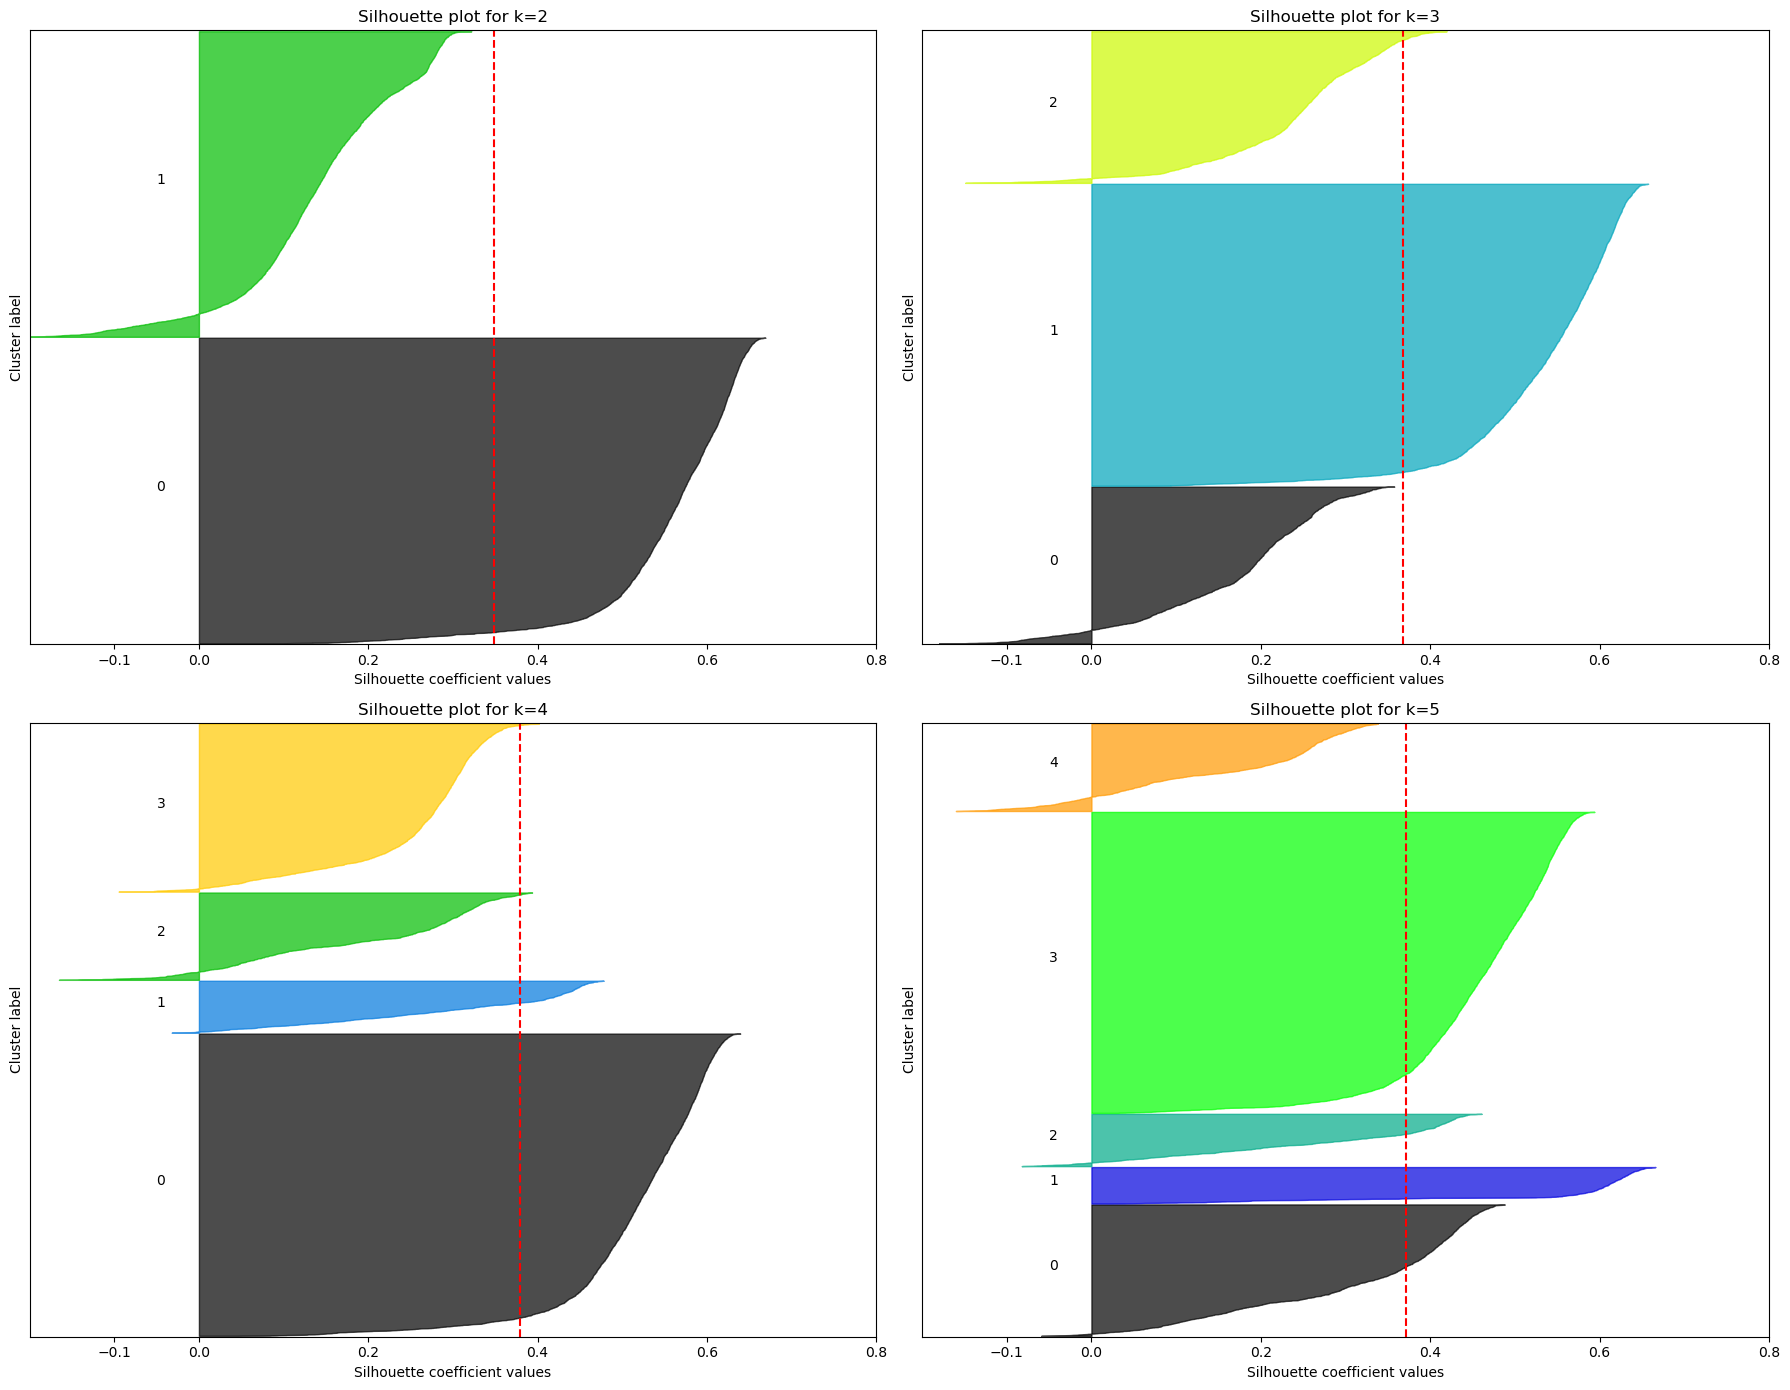

In [30]:
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5]

fig, axs = plt.subplots(2, 2)
fig.set_size_inches(18, 14)

for idx, n_clusters in enumerate(range_n_clusters):
    ax = axs[idx // 2, idx % 2]
    
    # Clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_raw)  # Ensure X_raw is your dataset

    # Calculate silhouette scores
    silhouette_avg = silhouette_score(X_raw, cluster_labels)
    silhouette_values = silhouette_samples(X_raw, cluster_labels)
    
    # Set the silhouette plot range
    ax.set_xlim([-0.2, 0.8])
    ax.set_ylim([0, len(X_raw) + (n_clusters + 1) * 10])  # Change X to X_raw

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i and sort them
        ith_cluster_silhouette_values = silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                         0, ith_cluster_silhouette_values,
                         facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for the next plot
        y_lower = y_upper + 10

    # Draw a vertical line for the average silhouette score
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    # Set titles and labels
    ax.set_title(f'Silhouette plot for k={n_clusters}')
    ax.set_xlabel("Silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    # Clear the yaxis labels and ticks
    ax.set_yticks([])
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8])

plt.tight_layout()
plt.show()

> * Again the silhouette plots for K=4 shows the optimanl clustering.

### (b) Determine which family is the majority

> * Results are with (c) answers.

### (c) Calculate the average Hamming distance, Hamming score, and Hamming loss

In [28]:
# Perform KMeans clustering with k=4
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(X_raw)  # Make sure X_raw is your features dataset

# Add the cluster labels to your DataFrame
y_raw['Cluster'] = cluster_labels

# Initialize a dictionary to store the majority labels for each cluster
majority_labels = {}

# Calculate majority labels for each cluster
for cluster_num in range(4):
    cluster_data = y_raw[y_raw['Cluster'] == cluster_num]
    majority_family = cluster_data['Family'].value_counts().idxmax()
    majority_genus = cluster_data['Genus'].value_counts().idxmax()
    majority_species = cluster_data['Species'].value_counts().idxmax()
    majority_labels[cluster_num] = {
        'Family': majority_family,
        'Genus': majority_genus,
        'Species': majority_species
    }

# Now calculate Hamming distance, score, and loss for each cluster
for cluster_num in range(4):
    # Filter the data for the current cluster
    cluster_data = y_raw[y_raw['Cluster'] == cluster_num]

    # Get the majority labels for the current cluster
    majority_triplet = majority_labels[cluster_num]
    
    # Calculate Hamming distance, score, and loss for the current cluster
    hamming_dist = np.mean([
        cluster_data['Family'] != majority_triplet['Family'],
        cluster_data['Genus'] != majority_triplet['Genus'],
        cluster_data['Species'] != majority_triplet['Species']
    ])
    
    # Hamming score is 1 - Hamming distance
    hamming_score = 1 - hamming_dist
    
    # Print out the metrics for the current cluster
    print(f"Cluster {cluster_num}:")
    print(f"  Majority Family: {majority_triplet['Family']}")
    print(f"  Majority Genus: {majority_triplet['Genus']}")
    print(f"  Majority Species: {majority_triplet['Species']}")
    print(f"  Hamming Distance: {hamming_dist:.4f}")
    print(f"  Hamming Score: {hamming_score:.4f}")
    print(f"  Hamming Loss: {hamming_dist:.4f}\n")

Cluster 0:
  Majority Family: Leptodactylidae
  Majority Genus: Adenomera
  Majority Species: AdenomeraHylaedactylus
  Hamming Distance: 0.0285
  Hamming Score: 0.9715
  Hamming Loss: 0.0285

Cluster 1:
  Majority Family: Hylidae
  Majority Genus: Hypsiboas
  Majority Species: HypsiboasCinerascens
  Hamming Distance: 0.1401
  Hamming Score: 0.8599
  Hamming Loss: 0.1401

Cluster 2:
  Majority Family: Dendrobatidae
  Majority Genus: Ameerega
  Majority Species: Ameeregatrivittata
  Hamming Distance: 0.5150
  Hamming Score: 0.4850
  Hamming Loss: 0.5150

Cluster 3:
  Majority Family: Hylidae
  Majority Genus: Hypsiboas
  Majority Species: HypsiboasCordobae
  Hamming Distance: 0.4448
  Hamming Score: 0.5552
  Hamming Loss: 0.4448



## 3. ISLR 12.6.2

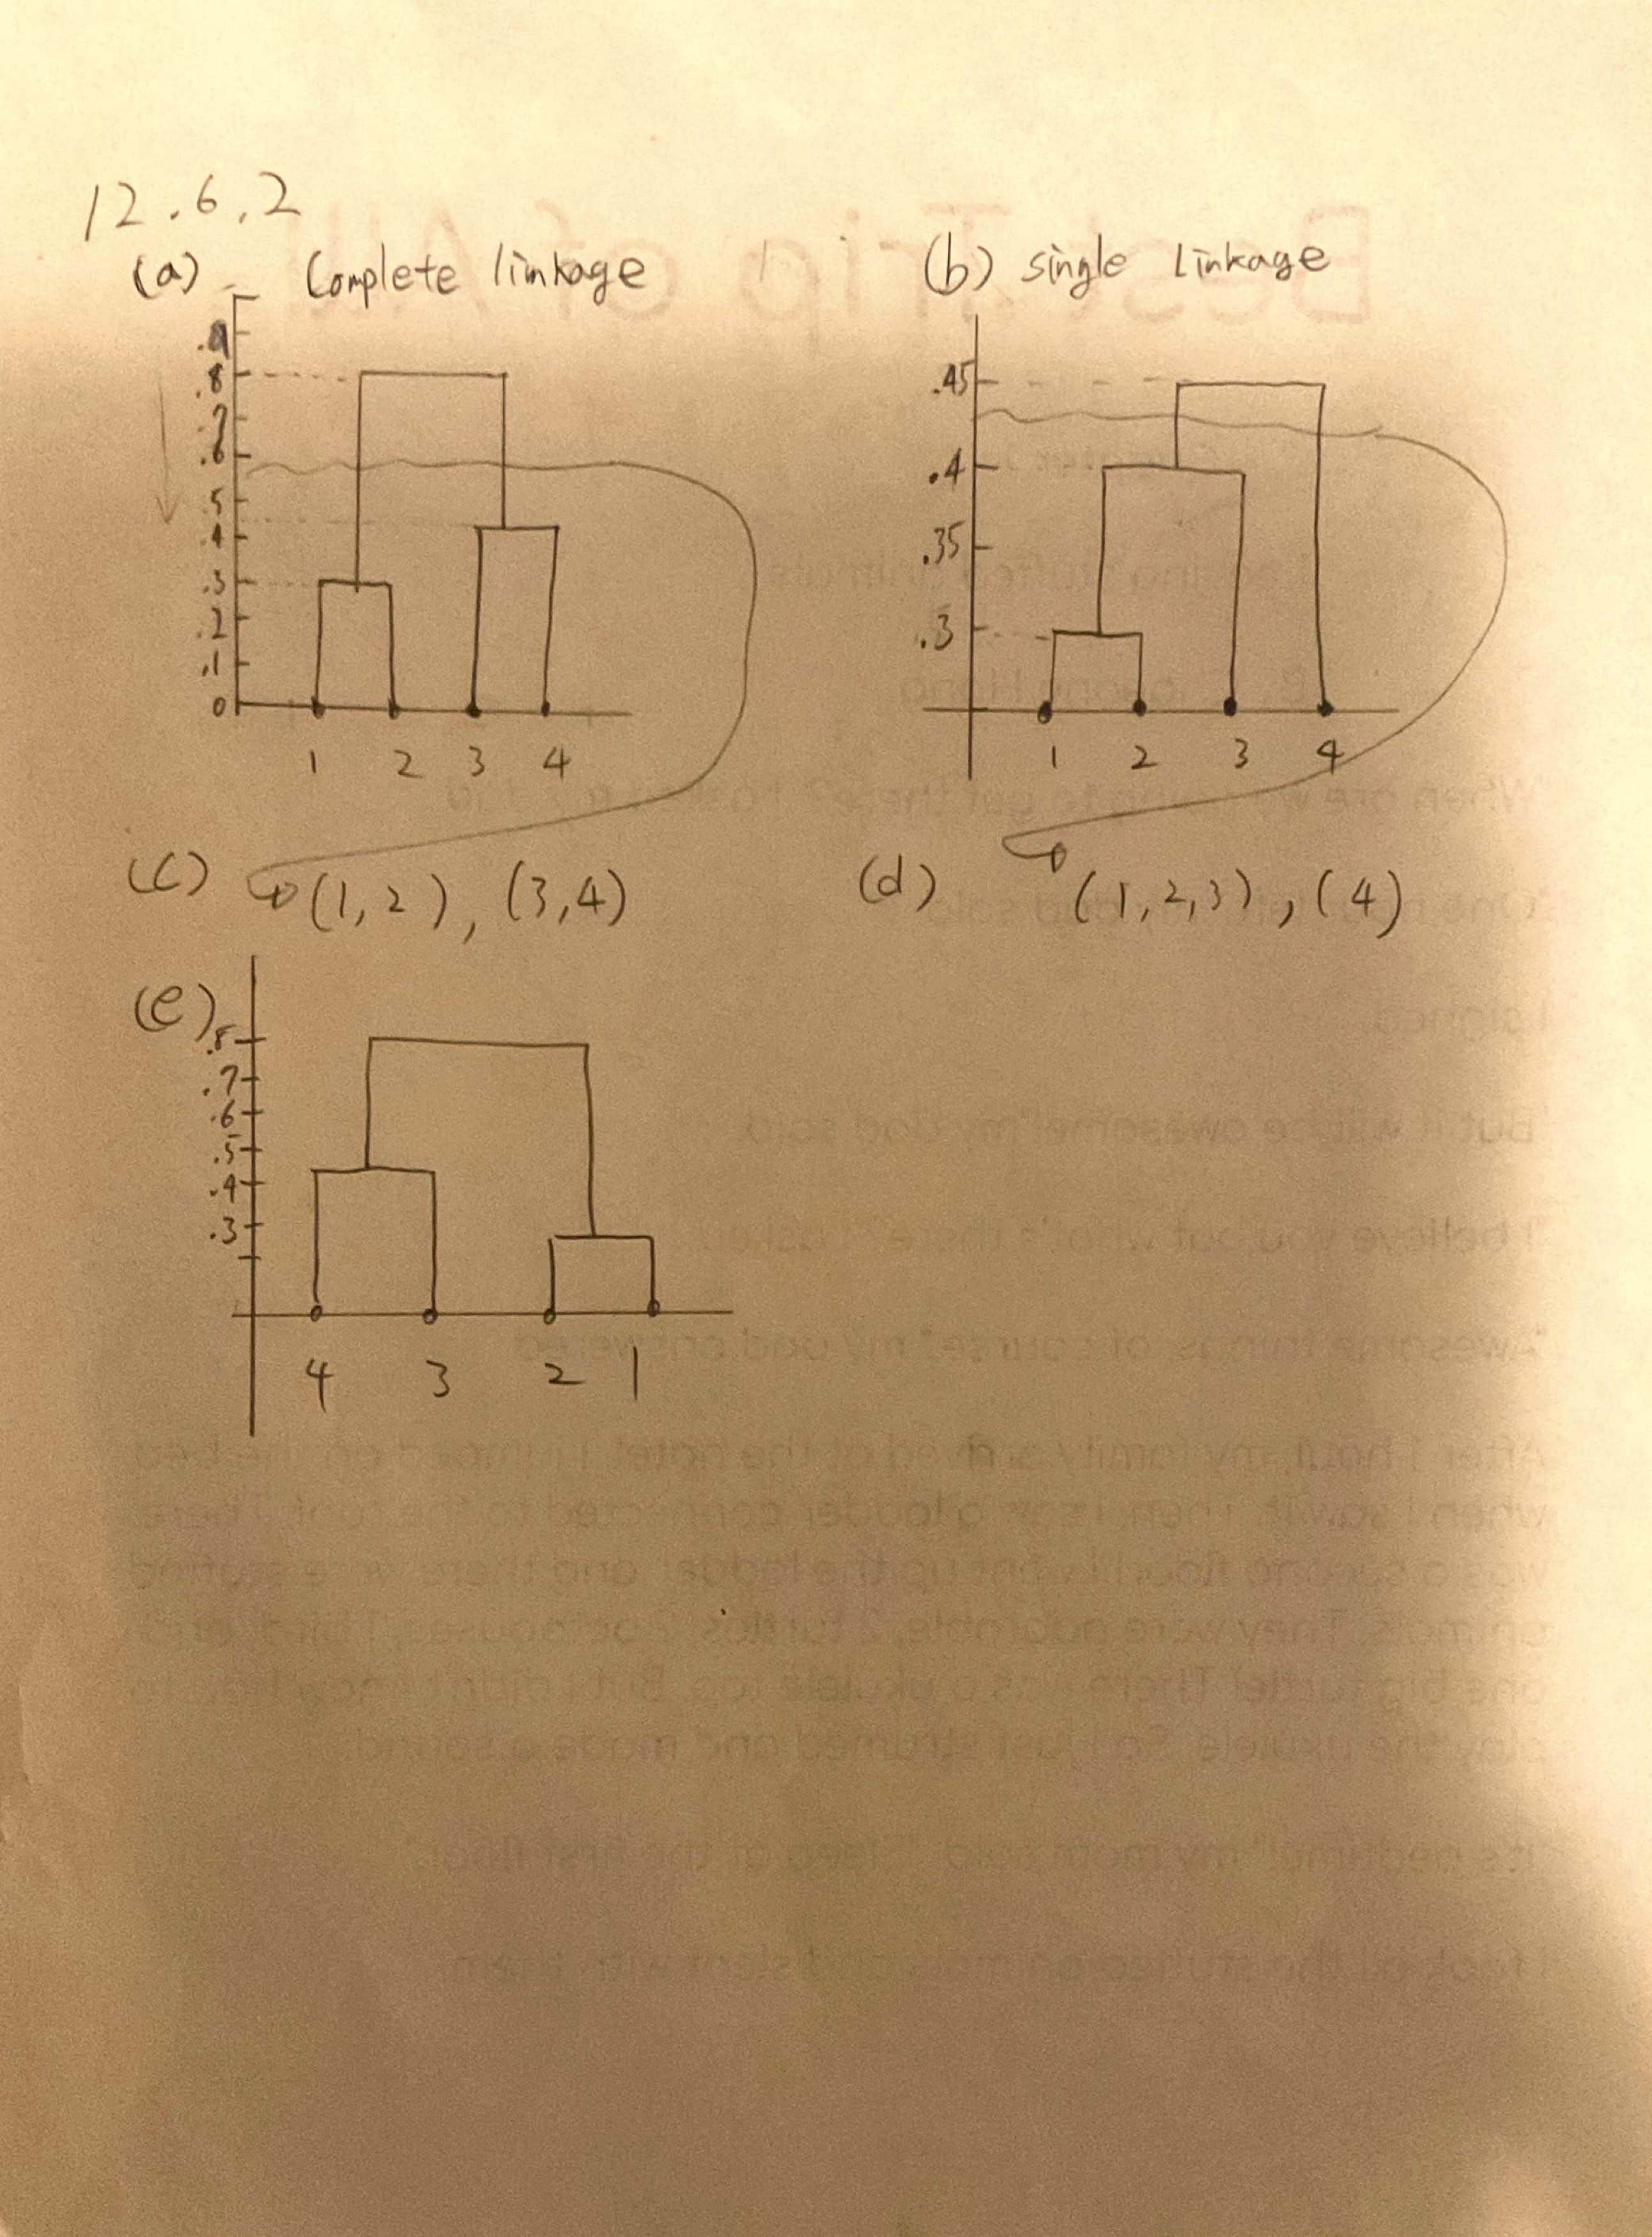